In [103]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plot
from sklearn.impute import SimpleImputer
import missingno as mano
import statsmodels.api as sm
from scipy.stats import norm
import pylab
from scipy.stats import kstest, norm
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [98]:
def loading_data():
    filename = input("Please enter file name with extension : ")
    filetype = filename.split(".")
    if filetype[-1] == "xlsx":
        data = pd.read_excel(filename)
    else:
        data = pd.read_csv(filename)
    return data

data = loading_data()

Please enter file name with extension : health.csv


In [99]:
def data_info(n):
    dimensions = data.shape
    print ("Shape of the data is :",dimensions)
    print ("Number of rows :", dimensions[0])
    print ("Number of columns :", dimensions[1])
    
    #print ("\n")
    print ("\n Columns Types:\n",data.dtypes)
    
    print ("\nThe first",n,"rows of the data are:\n",data.head(n))
    print ("\nThe last",n,"rows of the data are:\n",data.tail(n))
    print (data.info())

data_info(5)

Shape of the data is : (5110, 12)
Number of rows : 5110
Number of columns : 12

 Columns Types:
 id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

The first 5 rows of the data are:
       id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private   

In [100]:
def missing_values():
    data.isnull()
    data.replace(' ',np.nan, inplace=True)
    print (data.isnull().sum())
    
missing_values()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [104]:
bmi_less_than_age_15 = np.mean(data[data['age']<=15]['bmi'])
bmi_age_15_to_50 = np.mean(data[(data['age']>15) & (data['age']<=50)]['bmi'])
bmi_age_greater_50 = np.mean(data[data['age']>50]['bmi'])

def bmi_imputation(data):
    for index,row in data.iterrows():
        if math.isnan(row['bmi']):
            if row['age'] <=15:
                data.loc[index,'bmi'] = bmi_less_than_age_15
            elif (row['age'] >15) & (row['age']<=50):
                data.loc[index,'bmi'] = bmi_age_15_to_50
            elif row['age'] >50:
                data.loc[index,'bmi'] = bmi_age_greater_50
    return data

bmi_imputation(data)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,30.668094,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.00,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.00,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.00,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.00,0,0,Yes,Private,Rural,76.15,30.668094,Unknown,1
9,60491,Female,78.00,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [105]:
#CHECK ERROR VALUES
def error_values():
    temp = data.copy()
    for cols in temp.columns:
        temp[cols]=pd.to_numeric(temp[cols], errors='coerce') 
    temp.info()
    print (temp.describe().T)
    #return temp

error_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               0 non-null float64
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         0 non-null float64
work_type            0 non-null float64
Residence_type       0 non-null float64
avg_glucose_level    5110 non-null float64
bmi                  5110 non-null float64
smoking_status       0 non-null float64
stroke               5110 non-null int64
dtypes: float64(8), int64(4)
memory usage: 479.1 KB
                    count          mean           std    min        25%  \
id                 5110.0  36517.829354  21161.721625  67.00  17741.250   
gender                0.0           NaN           NaN    NaN        NaN   
age                5110.0     43.226614     22.612647   0.08     25.000   
hypertension       5110.0      0.097456      0.2

In [106]:
def num_col_analysis():
    
    global data
    
    data1 = pd.DataFrame(data)
    
    data1.hist(figsize=(20,20), bins = 30)
    plot.show()
    
    
    data1 = norm.rvs(size=1000)
    sm.qqplot(data1, line='45')
    pylab.show()
    
    print ("Kolmogorov Smirnov test")
    data1 = norm.rvs(size=1000)
    ks_statistic, p_value = kstest(data1, 'norm')
    print(ks_statistic, p_value)
    if p_value > 0.05:
        print ("Normal Distribution")
    else:
        print ("Data is not normally distributed")
        
    print ("Shapiro Wilk test")   
    data1 = norm.rvs(size=500)
    stat, p = shapiro(data1)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print("Fail to reject H0 that is data is normal distributed")
    else:
        print("Reject H0 that is data is normally distributed")    

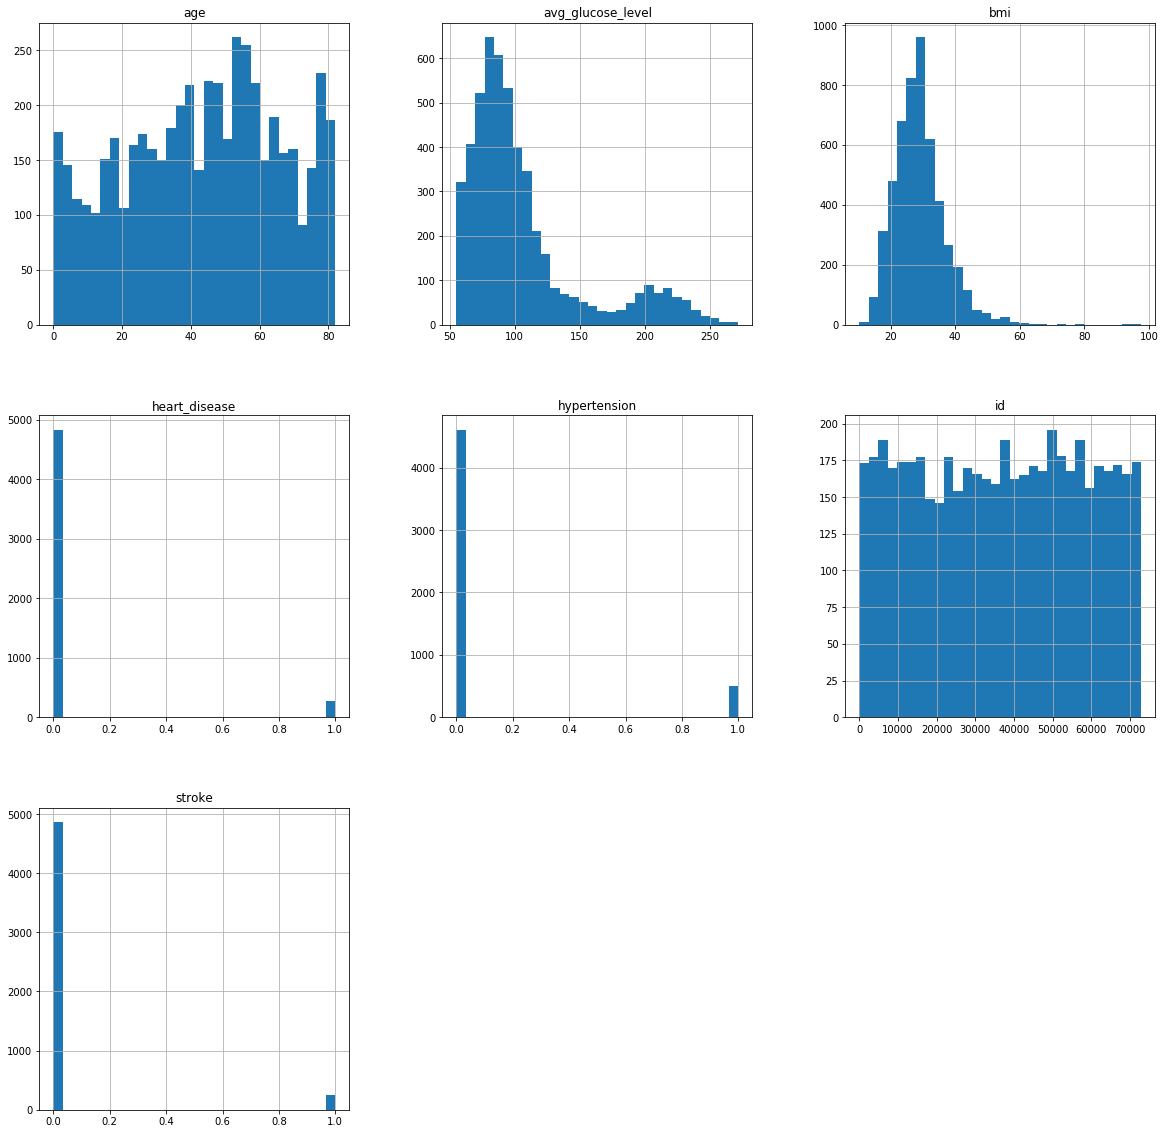

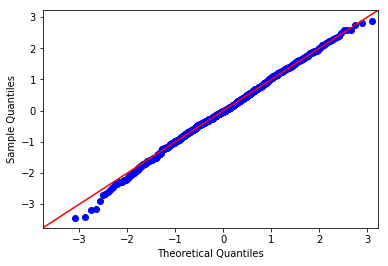

Kolmogorov Smirnov test
0.021674267244377377 0.7353819728330735
Normal Distribution
Shapiro Wilk test
Statistics=0.997, p=0.585
Fail to reject H0 that is data is normal distributed


In [107]:
num_col_analysis()


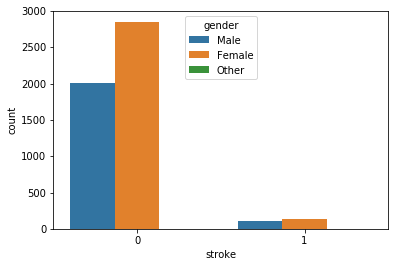

In [114]:
sns.countplot(x="stroke",data=data,hue='gender')

C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\seaborn\categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


Text(0.5,1,'Average glucose level')

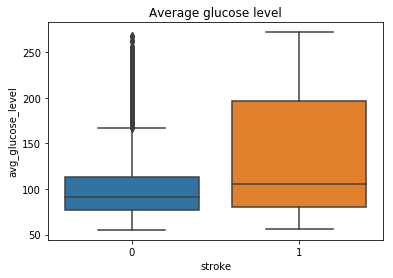

In [116]:
sns.boxplot(x="stroke",y="avg_glucose_level",data=data)
plt.title("Average glucose level")

In [111]:
def drop_val():
    global data
    d_col = input("Enter the column name whose null values you want to delete : ")
    data = data.dropna(axis=0, subset=[d_col])
    return data

def missing_value_numeric():
    n = int(input("Enter the number of columns you want to convert into numeric : "))
    for i in range(0,n):
        col_name = input("Enter column name : ")
        for col in col_name:
            data[col_name] = pd.to_numeric(data[col_name], errors='coerce')
        mean_imputation = SimpleImputer(strategy='mean')
        data[[col_name]]= mean_imputation.fit_transform(data[[col_name]])
    print (data.isnull().sum())    
    return data.dtypes
    
def missing_value_catgorical():
    n = int(input("Enter the number columns you want to convert into categorical columns : "))
    for i in range(0,n):
        col_name = input("Enter column name : ")
        for col in col_name: 
            data[col_name] = data[col_name].astype("category")
        mode_imputation = SimpleImputer(strategy='most_frequent')
        data[[col_name]]= mode_imputation.fit_transform(data[[col_name]])
    print (data.isnull().sum())    
    return data.dtypes  

In [118]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscala

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1,0.00353807,0.00354961,-0.00129594,0.00109236,0.000703948,0.00638817
age,0.00353807,1,0.276398,0.263796,0.238171,0.336187,0.245257
hypertension,0.00354961,0.276398,1,0.108306,0.174474,0.165121,0.127904
heart_disease,-0.00129594,0.263796,0.108306,1,0.161857,0.0442888,0.134914
avg_glucose_level,0.00109236,0.238171,0.174474,0.161857,1,0.171879,0.131945
bmi,0.000703948,0.336187,0.165121,0.0442888,0.171879,1,0.0451029
stroke,0.00638817,0.245257,0.127904,0.134914,0.131945,0.0451029,1


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  5110 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 379.3+ KB


In [120]:
X = data.drop('stroke', axis = 1)
Y = data['stroke']

In [121]:
from sklearn.preprocessing import LabelEncoder

num_cols = X.select_dtypes(include = ['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include = ['object']).columns.tolist()


def label_encoder(data):
    for i in cat_cols:
        le = LabelEncoder()
        data[i] = le.fit_transform(data[i])
    return data

label_encoder(data)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.00,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.00,0,0,1,3,0,202.21,30.668094,2,1
2,31112,1,80.00,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.00,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.00,1,0,1,3,0,174.12,24.000000,2,1
5,56669,1,81.00,0,0,1,2,1,186.21,29.000000,1,1
6,53882,1,74.00,1,1,1,2,0,70.09,27.400000,2,1
7,10434,0,69.00,0,0,0,2,1,94.39,22.800000,2,1
8,27419,0,59.00,0,0,1,2,0,76.15,30.668094,0,1
9,60491,0,78.00,0,0,1,2,1,58.57,24.200000,0,1


C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


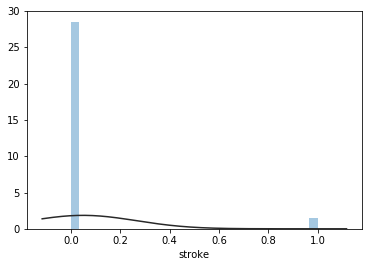

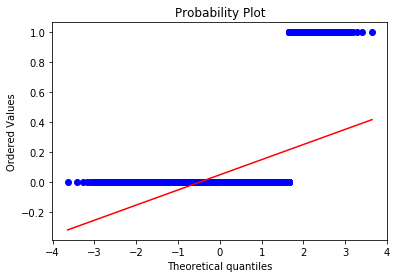

In [122]:
X = data.copy() 
Y = data['stroke']
X = X.drop(['stroke','id'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1234)

sns.distplot(Y,kde=False,fit=norm,bins=30)
plot.show()
stats.probplot(Y, dist="norm", plot=pylab)
plot.show() 

In [123]:
sm = SMOTE(random_state=1234)
X_smote, Y_smote = sm.fit_sample(X_train, Y_train)
#Y_smote.value_counts(normalize=True) * 100

C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\sklearn\utils\validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)
C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


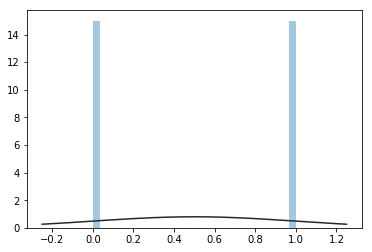

In [124]:
sns.distplot(Y_smote,kde=False,fit=norm,bins=30)
plot.show()

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_smote)
X_smote = scaler.transform(X_smote)
X_test = scaler.transform(X_test)

In [126]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_smote, Y_smote)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [127]:
y_pred = classifier.predict(X_test)

In [128]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(Y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(Y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[855 116]
 [ 38  13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       971
           1       0.10      0.25      0.14        51

    accuracy                           0.85      1022
   macro avg       0.53      0.57      0.53      1022
weighted avg       0.91      0.85      0.88      1022

Accuracy: 0.8493150684931506
